Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?
 >> The fundamental idea behind ensemble techniques is to combine multiple models to achieve better accuracy and robustness than a single model. Bagging trains models independently on random subsets of data to reduce variance and prevent overfitting. Boosting, on the other hand, trains models sequentially, giving more weight to previous errors to reduce bias and improve overall performance.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.
 >> A Random Forest Classifier reduces overfitting by averaging the results of many diverse decision trees built on random subsets of data and features, which lowers model variance. Two key hyperparameters are n_estimators, controlling the number of trees to improve stability, and max_features, limiting features per split to increase tree diversity and prevent overfitting.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case

>> Stacking is an ensemble method that combines predictions from multiple diverse models using a meta-model that learns the best way to blend them. Unlike bagging (which averages similar models) and boosting (which sequentially corrects errors), stacking focuses on combining different model types.

Example: Combining a Random Forest, XGBoost, and Logistic Regression with another Logistic Regression as the meta-model for loan default prediction.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?
  
 >> The OOB (Out-of-Bag) Score is a built-in validation metric in Random Forests that uses samples not included in each tree’s training (out-of-bag samples) to test its performance. It provides an unbiased estimate of accuracy without needing a separate validation set, making model evaluation efficient and data-effective.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases
 >> AdaBoost vs. Gradient Boosting:

Error handling: AdaBoost emphasizes misclassified samples; Gradient Boosting fits new learners to previous residuals.

Weight adjustment: AdaBoost updates sample weights; Gradient Boosting optimizes a loss function via gradient descent.

Use cases: AdaBoost for simple binary classification; Gradient Boosting for complex regression and classification tasks.

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

 >> CatBoost performs well on categorical features because it natively handles them using ordered target encoding and combinations of categories during training, avoiding the need for one-hot encoding or extensive preprocessing. It replaces categories with statistics derived from the target while preventing target leakage, allowing the model to efficiently learn from categorical data directly.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [2]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Wine dataset
data = load_wine()
X, y = data.data, data.target

# 2. Split into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Train KNN without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN without scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Apply StandardScaler, retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("KNN with scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best parameters from GridSearchCV:", grid.best_params_)

# 6. Train optimized KNN
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("Optimized KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


KNN without scaling:
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

KNN with scaling:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': np.int64(11)}
Optim

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

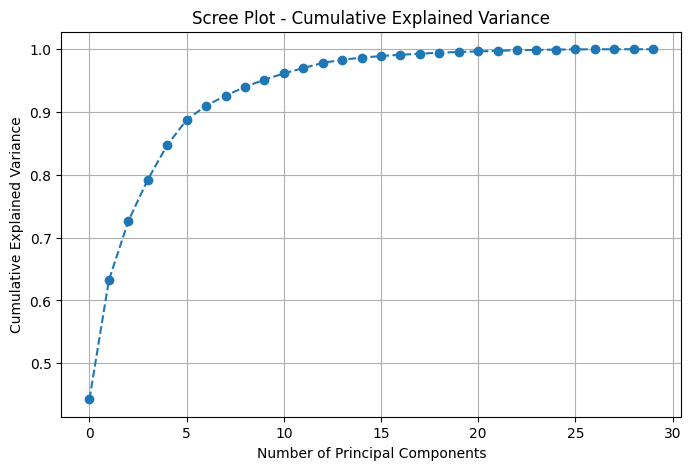

Number of components to retain 95% variance: 10
KNN Accuracy on original data: 0.9707602339181286
KNN Accuracy on PCA-transformed data: 0.9473684210526315


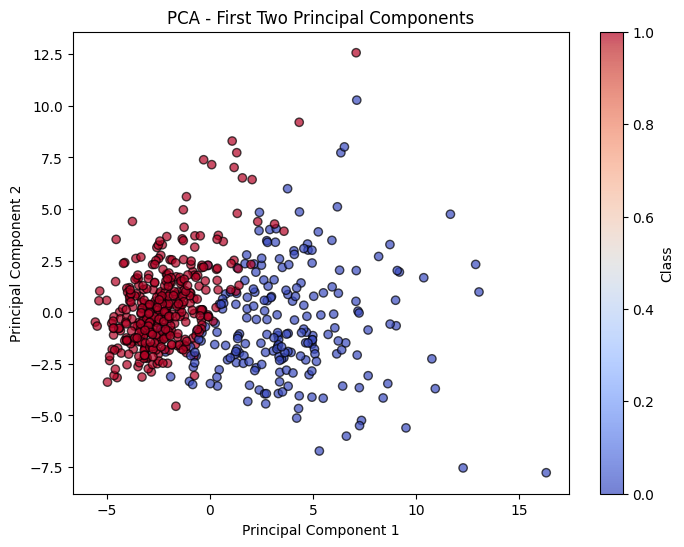

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA and plot scree plot
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform dataset
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)
print("Number of components to retain 95% variance:", X_pca.shape[1])

# 4. Train KNN on original data and PCA-transformed data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
acc_orig = accuracy_score(y_test, y_pred_orig)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("KNN Accuracy on original data:", acc_orig)
print("KNN Accuracy on PCA-transformed data:", acc_pca)

# 5. Visualize the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Class')
plt.show()


Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

MSE with Euclidean distance (K=5): 4788.464778493446
MSE with Manhattan distance (K=5): 5521.857990897004


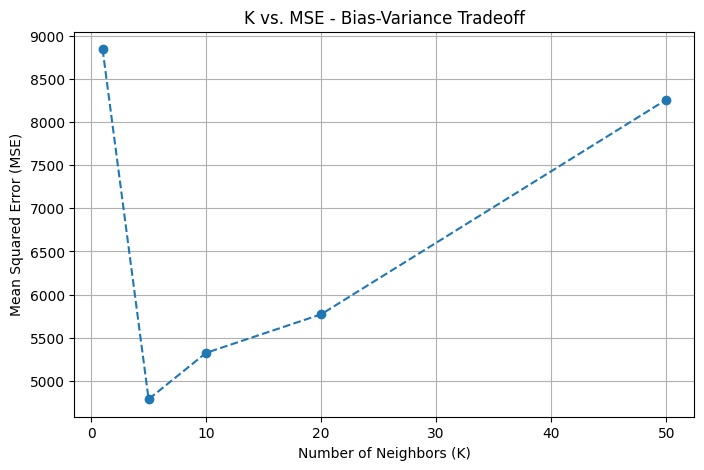

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 2a. KNN with Euclidean distance (K=5)
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
y_pred_euc = knn_euc.predict(X_test)
mse_euc = mean_squared_error(y_test, y_pred_euc)

# 2b. KNN with Manhattan distance (K=5)
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
y_pred_man = knn_man.predict(X_test)
mse_man = mean_squared_error(y_test, y_pred_man)

print("MSE with Euclidean distance (K=5):", mse_euc)
print("MSE with Manhattan distance (K=5):", mse_man)

# 3. Test multiple K values and analyze bias-variance tradeoff
k_values = [1, 5, 10, 20, 50]
mse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred))

# Plot K vs. MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_list, marker='o', linestyle='--')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs. MSE - Bias-Variance Tradeoff')
plt.grid(True)
plt.show()


Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).

/tmp/ipython-input-2688079118.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, np.nan, inplace=True)


KNN Results:
brute: Accuracy = 0.7208, Training Time = 0.0033 sec
kd_tree: Accuracy = 0.7208, Training Time = 0.0041 sec
ball_tree: Accuracy = 0.7208, Training Time = 0.0021 sec
Best algorithm: brute


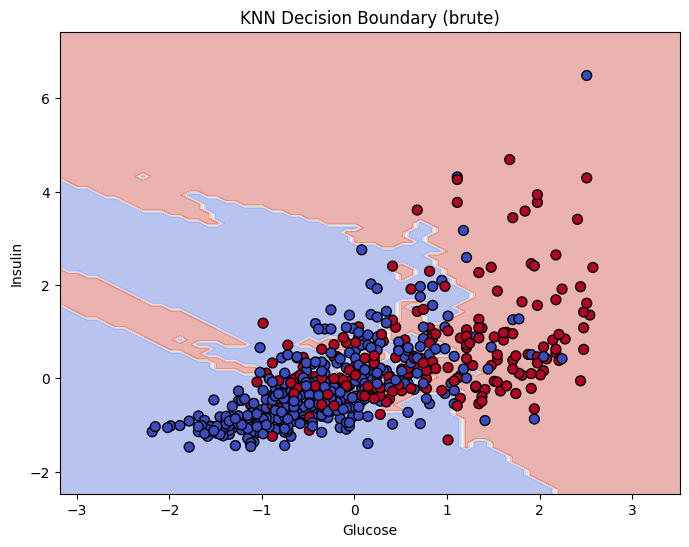

In [5]:
# Step 0: Imports
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Load Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
data = pd.read_csv(url, names=columns)

# Step 2: Introduce missing values (some columns have 0 as missing)
missing_cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in missing_cols:
    data[col].replace(0, np.nan, inplace=True)

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=columns)

# Step 3: Split dataset
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train KNN with different algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train_scaled, y_train)
    end = time.time()
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[algo] = {'accuracy': accuracy, 'training_time': end-start}

# Display results
print("KNN Results:")
for algo in results:
    print(f"{algo}: Accuracy = {results[algo]['accuracy']:.4f}, Training Time = {results[algo]['training_time']:.4f} sec")

# Step 5: Plot decision boundary for best-performing algorithm
# We'll use the two most important features
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X_train_scaled, y_train)
important_features_idx = selector.get_support(indices=True)

best_algo = max(results, key=lambda k: results[k]['accuracy'])
print(f"Best algorithm: {best_algo}")

# Train KNN with best algorithm on 2 features
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_new, y_train)

# Prepare meshgrid for plotting
h = 0.1
X_min, X_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
Y_min, Y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, h),
                     np.arange(Y_min, Y_max, h))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_new[:,0], X_new[:,1], c=y_train, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel(columns[important_features_idx[0]])
plt.ylabel(columns[important_features_idx[1]])
plt.title(f"KNN Decision Boundary ({best_algo})")
plt.show()
